# Get the data

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 


In [4]:
import pandas as pd
dataset = pd.read_csv('/content/gdrive/MyDrive/Dockship/learn_ml_2021_grand_ai_challenge-dataset/new_train.csv')
#dataset.tail()

In [ ]:
dataset.corr()

# for stock-1






In [ ]:
inp1= dataset[["Open-Stock-1","High-Stock-1","Low-Stock-1","VWAP-Stock-1"]]
op1 = dataset['Close-Stock-1']
inp2 = dataset[["Open-Stock-2","High-Stock-2","Low-Stock-2","VWAP-Stock-2"]]
op2 = dataset['Close-Stock-2']
inp3 = dataset[["Open-Stock-3","High-Stock-3","Low-Stock-3","VWAP-Stock-3"]]
op3 = dataset['Close-Stock-3']
inp4 = dataset[["Open-Stock-4","High-Stock-4","Low-Stock-4","VWAP-Stock-4"]]
op4 = dataset['Close-Stock-4']
inp5 = dataset[["Open-Stock-5","High-Stock-5","Low-Stock-5","VWAP-Stock-5"]]
op5 = dataset['Close-Stock-5']


In [ ]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(x_train.values)
    rmse= np.sqrt(-cross_val_score(model, x_train,y_train, scoring="neg_mean_squared_error", cv = kf,n_jobs=-1))
    return(rmse)

In [ ]:
x,y = inp5,op5
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)

lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1,normalize=True,max_iter=100000))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.99, random_state=3,max_iter=100000))

score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
l1 = make_pipeline(RobustScaler(),ElasticNet(alpha=0.000001, l1_ratio=0.5, random_state=3,max_iter=100000,selection='random'))
score = rmsle_cv(l1)
print("\nUpdated-Enet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
l2 = make_pipeline(StandardScaler(), Lasso(alpha =0.0001, random_state=1,normalize=True,max_iter=100000))
score = rmsle_cv(l2)
print("\nUpdated-lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [ ]:
l3 = make_pipeline(RobustScaler(),ElasticNet(alpha=0.0000001, l1_ratio=0.000009, random_state=1,max_iter=1000000,selection='random',normalize=True))
score = rmsle_cv(l3)
print("\nUpdated-Enet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
l4 = make_pipeline(RobustScaler(),Lasso(alpha =0.0035, random_state=1,max_iter=10000000))
score = rmsle_cv(l4)
print("\nUpdated-lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


In [ ]:
print(rmsle_cv(Lasso(alpha =0.0035, random_state=1,max_iter=10000000)))

None


In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
l5 = make_pipeline(RobustScaler(),SGDRegressor(max_iter=1000000,alpha=0.000001))
score = rmsle_cv(l5)
print("\nUpdated-lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Updated-lasso score: 1.7323 (0.5460)



# Prediction for Test data

In [45]:
dataset2 = pd.read_csv('/content/gdrive/MyDrive/Dockship/learn_ml_2021_grand_ai_challenge-dataset/new_test.csv')
#dataset2.head()

In [ ]:
model = l4
model.fit(x_train, y_train)
pred = model.predict(dataset2[list(x.columns)])

In [46]:
id_sv = dataset2['Date']
sol = pd.DataFrame()
sol['Date']=id_sv
#sol["Close-Stock-1"]=pred
#sol.to_csv('sol.csv',index = False)

In [ ]:
sol['Close-Stock-5'] = pred

In [49]:
#pred2 = pred
sol['Close-Stock-1'] = sol['Close-Stock-1'].apply(lambda x:'%.2f'%x)
sol['Close-Stock-2'] = sol['Close-Stock-2'].apply(lambda x:'%.2f'%x)
sol['Close-Stock-3'] = sol['Close-Stock-3'].apply(lambda x:'%.2f'%x)
sol['Close-Stock-4'] = sol['Close-Stock-4'].apply(lambda x:'%.2f'%x)
sol['Close-Stock-5'] = sol['Close-Stock-5'].apply(lambda x:'%.2f'%x)


In [ ]:
sol.head()

,Date,Close-Stock-1,Close-Stock-2,Close-Stock-3,Close-Stock-4,Close-Stock-5
0,2011-08-04,481.539918,202.631148,3076.538188,999.567524,1294.342289
1,2011-08-05,470.099668,194.691965,3049.502299,959.895661,1218.835967
2,2011-08-08,465.579570,194.809377,3065.670292,960.646711,1241.492563
3,2011-08-09,461.419479,198.247229,3106.160026,951.172115,1212.739614
4,2011-08-10,478.599854,198.632813,3164.853847,964.363576,1240.557896


In [50]:
sol.to_csv('sol.csv',index = False)

# LSTM

In [ ]:
#Create a new dataframe with only the 'Close column
data = dataset.filter(['Close-Stock-3'])
#Convert the dataframe to a numpy array
dataset_new = data.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset_new) * .8 ))

training_data_len

240

In [ ]:
#Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset_new)

#scaled_data

In [ ]:
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(120, len(train_data)):
    x_train.append(train_data[i-120:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM,Dropout

#Defining the LSTM Recurrent Model
#Step 2 Build Model
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))


regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')
regressor.fit(x_train, y_train, epochs = 15, batch_size = 32)

Epoch 1/15
4/4 [==============================] - 7s 218ms/step - loss: 0.2953
Epoch 2/15
4/4 [==============================] - 1s 219ms/step - loss: 0.2113
Epoch 3/15
4/4 [==============================] - 1s 223ms/step - loss: 0.1602
Epoch 4/15
4/4 [==============================] - 1s 217ms/step - loss: 0.1620
Epoch 5/15
4/4 [==============================] - 1s 219ms/step - loss: 0.1217
Epoch 6/15
4/4 [==============================] - 1s 217ms/step - loss: 0.1356
Epoch 7/15
4/4 [==============================] - 1s 220ms/step - loss: 0.1035
Epoch 8/15
4/4 [==============================] - 1s 215ms/step - loss: 0.0894
Epoch 9/15
4/4 [==============================] - 1s 222ms/step - loss: 0.1138
Epoch 10/15
4/4 [==============================] - 1s 217ms/step - loss: 0.1166
Epoch 11/15
4/4 [==============================] - 1s 216ms/step - loss: 0.0862
Epoch 12/15
4/4 [==============================] - 1s 220ms/step - loss: 0.0849
Epoch 13/15
4/4 [==============================] 

In [ ]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 120: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset_new[training_data_len:, :]
for i in range(120, len(test_data)):
    x_test.append(test_data[i-120:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = regressor.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(predictions, y_test))
rmse

462.8304423482106

In [ ]:
# Get the root mean squared error (RMSE)
import math
rmse = math.sqrt(mean_squared_error(predictions, y_test))
rmse

462.8304423482106

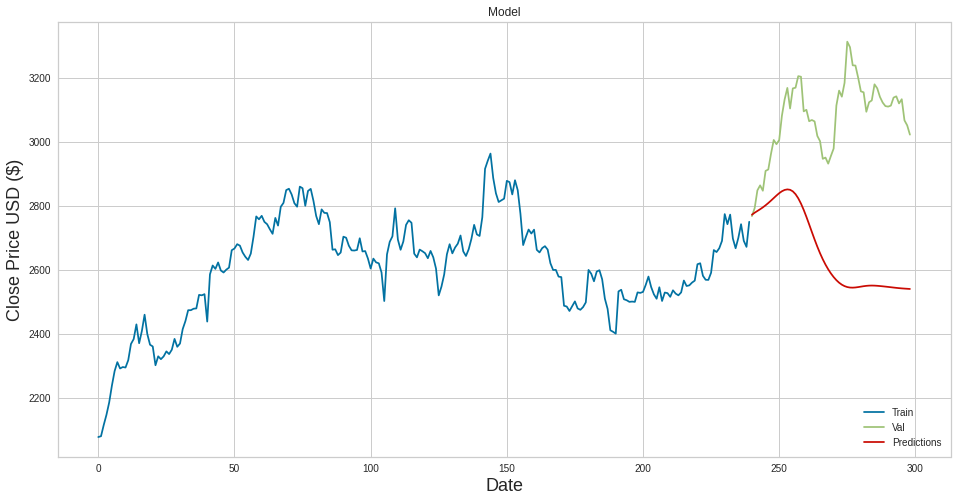

In [ ]:
# Plot the data
import matplotlib.pyplot as plt

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close-Stock-3'])
plt.plot(valid[['Close-Stock-3', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#Create the prediction data set
#Create a new array containing scaled values 
pred_data = scaled_data[len(scaled_data)-97 - 120: , :]
#Create the data sets x_test and y_test
x_pred = []
#y_test = dataset_new[training_data_len:, :]
for i in range(120, len(pred_data)):
    x_pred.append(pred_data[i-120:i, 0])
    
# Convert the data to a numpy array
x_pred = np.array(x_pred)

# Reshape the data
x_pred = np.reshape(x_pred, (x_pred.shape[0], x_pred.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_pred)
predictions = scaler.inverse_transform(predictions)


In [ ]:
id_sv = dataset2['Date']
sol = pd.DataFrame()
sol['Date']=id_sv
sol["Close-Stock-1"]=predictions
#sol.to_csv('sol.csv',index = False)

NameError: ignored

In [ ]:
sol["Close-Stock-5"]=predictions

In [ ]:
sol.to_csv('sol.csv',index = False)

# New Section

In [ ]:
dataset.head()

,Date,Open-Stock-1,High-Stock-1,Low-Stock-1,Close-Stock-1,VWAP-Stock-1,Volume-Stock-1,Turnover-Stock-1,Open-Stock-2,High-Stock-2,Low-Stock-2,Close-Stock-2,VWAP-Stock-2,Volume-Stock-2,Turnover-Stock-2,Open-Stock-3,High-Stock-3,Low-Stock-3,Close-Stock-3,VWAP-Stock-3,Volume-Stock-3,Turnover-Stock-3,Open-Stock-4,High-Stock-4,Low-Stock-4,Close-Stock-4,VWAP-Stock-4,Volume-Stock-4,Turnover-Stock-4,Open-Stock-5,High-Stock-5,Low-Stock-5,Close-Stock-5,VWAP-Stock-5,Volume-Stock-5,Turnover-Stock-5
0,2010-06-01,1889.7,1890.00,1838.00,1855.10,1855.75,568273,105457457545000,285.40,285.95,281.50,283.00,283.72,3191773,90557243170000,2095.00,2097.8,2045.00,2077.25,2088.95,70547,14736933230000,851.65,864.80,833.1,837.95,844.44,3878011,327474904340000,1235.0,1238.00,1177.0,1181.70,1197.29,1786082,213845404410000
1,2010-06-02,1848.0,1862.75,1828.00,1853.05,1842.82,945167,174177161135000,284.00,284.80,279.25,281.30,281.05,2704797,76017076445000,2061.45,2098.0,2023.00,2079.85,2059.52,55547,11440017990000,844.70,849.90,823.0,842.30,838.31,3320996,278403743240000,1195.0,1206.95,1168.5,1201.15,1189.87,1307410,155564994855000
2,2010-06-03,1864.1,1910.00,1864.10,1905.60,1893.91,679689,128727119355000,283.00,286.85,282.50,285.50,285.34,2489752,71043460510000,2131.50,2131.5,2091.05,2114.90,2107.84,55130,11620529360000,851.40,859.05,848.2,854.10,853.51,2494522,212910342645000,1211.0,1248.00,1211.0,1242.30,1231.63,1482919,182640434320000
3,2010-06-04,1906.0,1909.80,1880.10,1885.70,1889.21,509435,96242800140000,288.85,291.80,277.00,290.85,289.81,3188813,92414802585000,2114.90,2156.0,2095.50,2146.75,2145.36,29302,6286330280000,854.10,868.60,854.1,865.85,862.85,2963920,255740999120000,1240.0,1258.00,1240.0,1245.45,1249.72,1454459,181767075850000
4,2010-06-07,1867.0,1894.85,1808.35,1876.65,1873.32,961913,180196832650000,285.00,289.10,285.00,287.70,287.01,2198836,63109395135000,2132.35,2209.0,2112.00,2185.25,2180.52,78919,17208425860000,712.00,850.00,712.0,841.95,839.89,3471483,291567400640000,1218.6,1225.00,1196.0,1214.80,1209.27,1424594,172272511430000


In [42]:
df = dataset.iloc[:,[0,18]]
df['pred'] = lasso.predict(x)
df.head()

,Date,Close-Stock-3,pred
0,2010-06-01,2077.25,2087.852281
1,2010-06-02,2079.85,2062.700290
2,2010-06-03,2114.90,2107.509544
3,2010-06-04,2146.75,2149.164260
4,2010-06-07,2185.25,2186.587485


In [41]:
df.corr()

,Close-Stock-3,pred,distance
Close-Stock-3,1.000000,0.997942,0.113874
pred,0.997942,1.000000,0.049932
distance,0.113874,0.049932,1.000000


In [31]:
x =  dataset[["Open-Stock-3","High-Stock-3","Low-Stock-3","VWAP-Stock-3"]]
y = dataset['Close-Stock-3']


In [47]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import LinearRegression
for i in range(1,6):
    x =  dataset[["Open-Stock-"+str(i),"High-Stock-"+str(i),"Low-Stock-"+str(i),"VWAP-Stock-"+str(i)]]
    #x = df
    y = dataset['Close-Stock-'+str(i)]
    x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, test_size = 0.2, random_state = 101)
    lof = LocalOutlierFactor(n_neighbors=25,n_jobs=-1)
    yhat = lof.fit_predict(x_train)
    mask = yhat != -1
    x_train, y_train = x_train[mask, :], y_train[mask]  
    lasso =  Lasso(alpha =0.0005, random_state=1,normalize=True,max_iter=100000)
    lasso.fit(x,y)
    print(np.sqrt(mean_squared_error(y_test,lasso.predict(x_test))))
    sol['Close-Stock-'+str(i)] =  lasso.predict(dataset2[list(x.columns)])

10.315221953200108
1.1220376956066076
17.709211358832636
5.932154450678855
8.409034759109726


In [6]:
x =  dataset[["Open-Stock-3","High-Stock-3","Low-Stock-3","VWAP-Stock-3"]]
y = dataset['Close-Stock-3']
import statsmodels.api as sm

x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, test_size = 0.2, random_state = 101)

X_train_lm = sm.add_constant(x_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.summary()
#print(x_train.shape, y_train.shape)
#lasso =  Lasso(alpha =0.0005, random_state=1,normalize=True,max_iter=100000)
#lasso.fit(x,y)
#print(np.sqrt(mean_squared_error(y_test,lasso.predict(x_test))))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.453e+04
Date:                Fri, 15 Jan 2021   Prob (F-statistic):          4.23e-279
Time:                        08:36:39   Log-Likelihood:                -984.13
No. Observations:                 239   AIC:                             1978.
Df Residuals:                     234   BIC:                             1996.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.1533     11.129      2.440      0.015       5.227      49.079
x1            -0.1604      0.035     -4.539      0.000      -0.230      -0.091
x2             0.0836      0.045      1.843      0.067      -0.006       0.173
x3             0.0842      0.054      1.566      0.119      -0.022       0.190
x4             0.9811      0.066     14.916      0.000       0.851       1.111
==============================================================================
Omnibus:                       10.981   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               24.265
Skew:                           0.006   Prob(JB):                     5.38e-06
Kurtosis:                       4.561   Cond. No.                     6.19e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

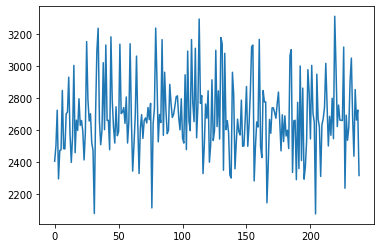

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y_train)

In [ ]:
sol.head()

,Date,Close-Stock-1,Close-Stock-2,Close-Stock-3,Close-Stock-4,Close-Stock-5
0,2011-08-04,475.467432,202.692588,3083.178485,1000.156427,1294.286099
1,2011-08-05,465.134361,194.731685,3046.491128,958.957432,1218.830500
2,2011-08-08,463.426374,194.849368,3071.135820,958.197711,1240.353783
3,2011-08-09,461.043495,198.147550,3108.503454,947.115058,1211.642156
4,2011-08-10,470.592574,198.700054,3169.999478,965.250636,1240.427777
